## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Reading Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
single_image = X_train[0]

In [5]:
single_image.shape

(28, 28)

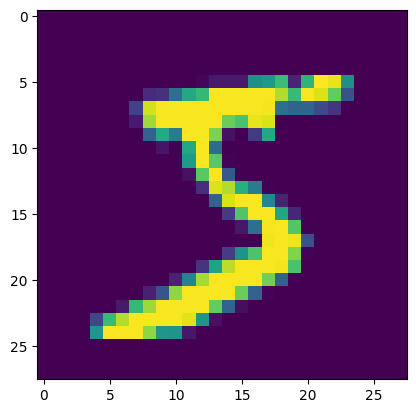

In [6]:
plt.imshow(single_image)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Data Preprocessing

### Transform Target Variables into Categorical

In [8]:
y_train.shape

(60000,)

In [9]:
y_example = to_categorical(y_train)
y_example.shape

(60000, 10)

In [10]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

### Converting Test Labels and Training Labels into Categorical

In [11]:
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train = to_categorical(y_train, num_classes=10)

### Normalizing the Training Data

In [12]:
single_image.max()

255

In [13]:
single_image.min()

0

In [14]:
X_train = X_train / 255
X_test = X_test / 255

In [15]:
scaled_image = X_train[0]

In [16]:
scaled_image.max()

1.0

In [17]:
scaled_image.min()

0.0

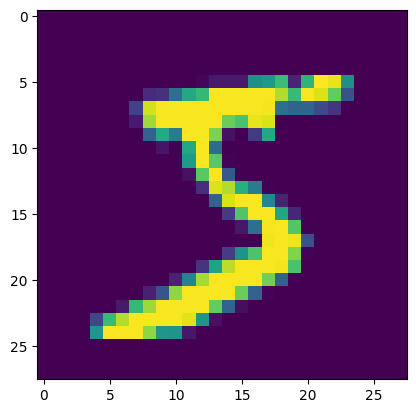

In [18]:
plt.imshow(scaled_image)

### Reshaping the Data

In [19]:
X_train.shape

(60000, 28, 28)

In [20]:
X_test.shape

(10000, 28, 28)

In [21]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

## Creating the Model

In [22]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128, activation="relu"))

model.add(Dense(units=10, activation="softmax"))

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

## Training the Model

In [23]:
early_stopping = EarlyStopping(monitor="val_loss",patience=1)

In [24]:
model.fit(
    x=X_train,
    y=y_cat_train,
    epochs=10,
    validation_data=(X_test, y_cat_test),
    callbacks=[early_stopping]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9122 - loss: 0.2898 - val_accuracy: 0.9848 - val_loss: 0.0526
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9850 - loss: 0.0482 - val_accuracy: 0.9835 - val_loss: 0.0471
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9900 - loss: 0.0302 - val_accuracy: 0.9875 - val_loss: 0.0374
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9943 - loss: 0.0181 - val_accuracy: 0.9875 - val_loss: 0.0369
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9965 - loss: 0.0119 - val_accuracy: 0.9897 - val_loss: 0.0288
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9968 - loss: 0.0092 - val_accuracy: 0.9876 - val_loss: 0.0409


## Model Evaluation

In [25]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

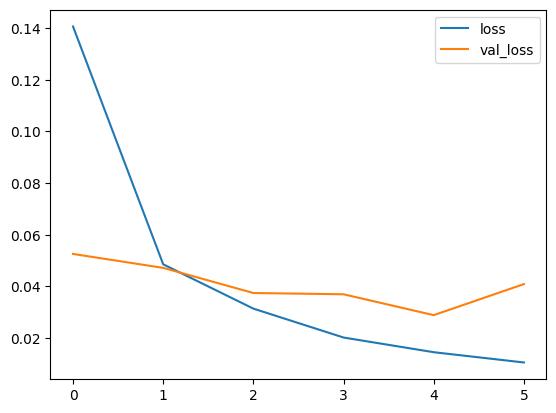

In [26]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

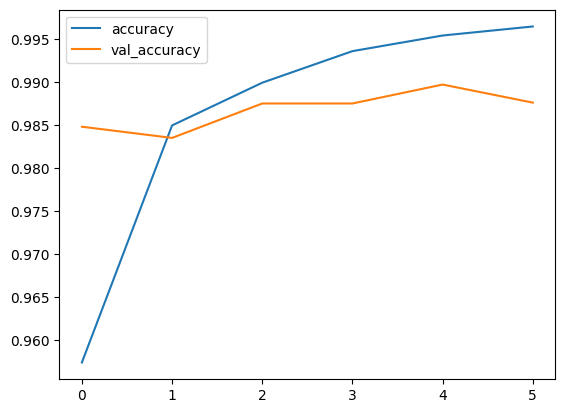

In [27]:
metrics[['accuracy', 'val_accuracy']].plot()

In [28]:
model.metrics_names

['loss', 'compile_metrics']

In [29]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.040871117264032364, 0.9876000285148621]

## Predictions

In [30]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step


In [31]:
print(classification_report(y_true=y_test, y_pred=predicted_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Axes: >

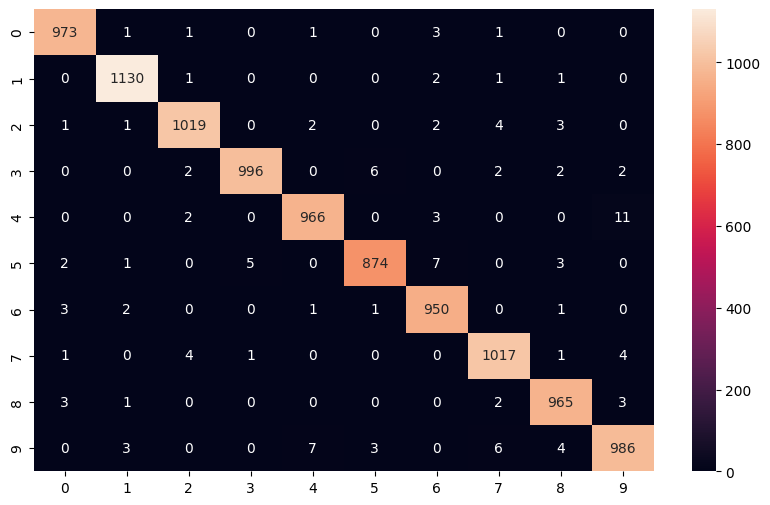

In [32]:
plt.figure(figsize=(10,6))
matrix = confusion_matrix(y_true=y_test, y_pred=predicted_classes)
sns.heatmap(matrix, annot=True, fmt='1.0f')

## Predicting a Single Image

In [33]:
my_number = X_test[0]

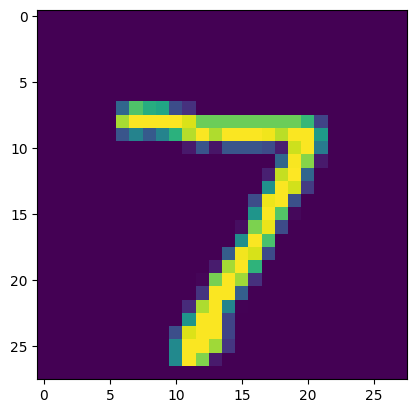

In [34]:
plt.imshow(my_number.reshape(28,28))

In [35]:
single_image_prediction = model.predict(my_number.reshape(1, 28, 28, 1))
predicted_class = np.argmax(single_image_prediction, axis=1)
predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([7], dtype=int64)

In [36]:
y_test[0]

7